# AURTHOR  - SHIVANSHI  TIWARI

## Exploratory Data Analysis - Retail 

### Problem Statement: Perform ''Exploratory Data Analysis'' on 'SampleSuperstore' Dataset
##### As a business manager, we need to find the weak areas and where can we work to to increase profits

Lets Begin

#### Importing  Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as ply

import warnings
warnings.filterwarnings("ignore")

### Step 1 : Import and Read Dataset

In [6]:
df = pd.read_csv(r'C:\Users\shiva\Downloads\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
df.shape  # Rows and Columns in the dataset

(9994, 13)

In [11]:
df.describe()  # Statistical Measures

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.info()  # summary of the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [16]:
df.duplicated().sum() # checking for duplicates

17

In [17]:
df.drop_duplicates(inplace=True)

### Step 2 : Data Visualization

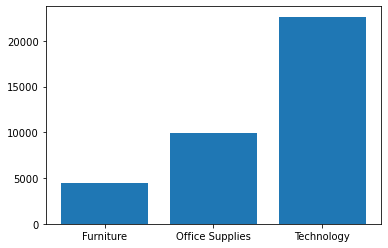

In [25]:
plt.bar('Category','Sales', data = df)
plt.show()

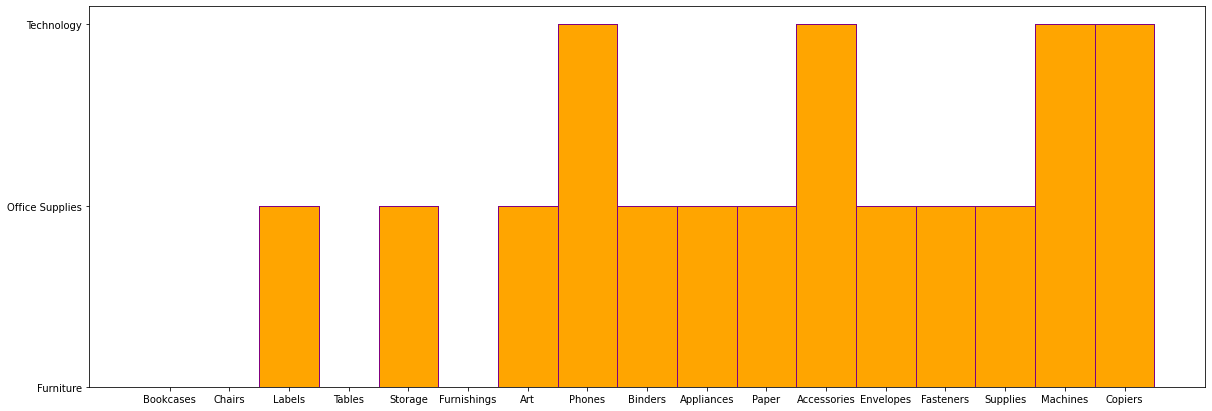

In [32]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(20,7))
plt.bar('Sub-Category','Category',data=df,color='orange',edgecolor = 'purple', width = 1)
plt.show()

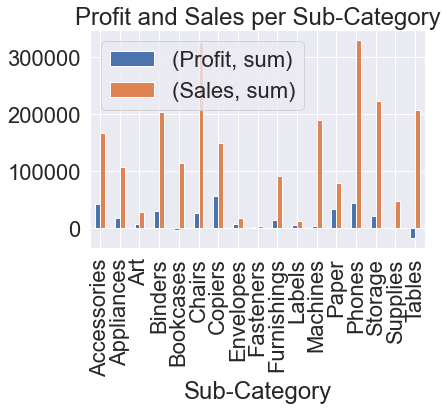

In [58]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Profit and Sales per Sub-Category')
plt.legend()
plt.show()

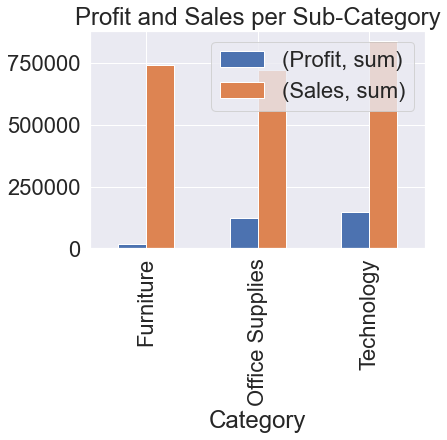

In [65]:
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Profit and Sales per Sub-Category')
plt.legend()
plt.show()

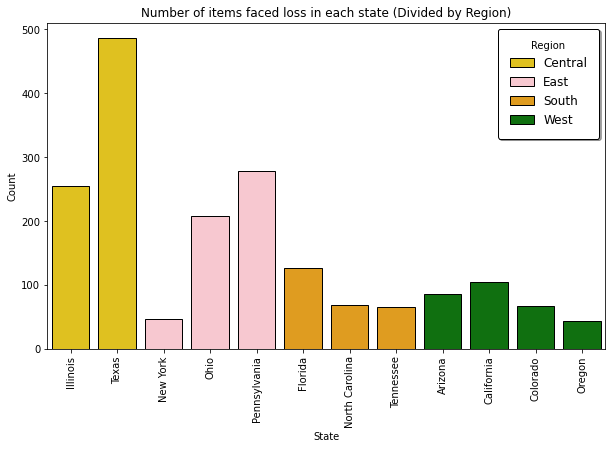

<Figure size 432x288 with 0 Axes>

In [42]:
state_neg2=df.loc[df.Profit < 0].reset_index(drop=True)
state_pos2=df.loc[df.Profit >= 0].reset_index(drop=True)
dft=state_neg2.groupby(['Region','State'], as_index=False)['Profit'].count()
dft=dft[dft.Profit > 40]

fig,ax = plt.subplots(figsize=(10,6))
def plot_region(ax):
    d={'Central':'gold','East':'pink','South':'orange','West':'g'}
    dft['color'] = dft['Region'].map(d)
    sns.barplot(data=dft, x=dft.State, y='Profit', hue='Region', palette=d, dodge=False, edgecolor='black')
    ax.set_xticklabels(dft['State'],rotation=90)
    ax.set_title(label="Number of items faced loss in each state (Divided by Region)", loc='center', pad=None)
    ax.set_ylabel('Count')
    ax.set_xlabel('State')
    ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, title="Region", shadow=True)
    plt.show()
plot_region(ax)
plt.tight_layout()

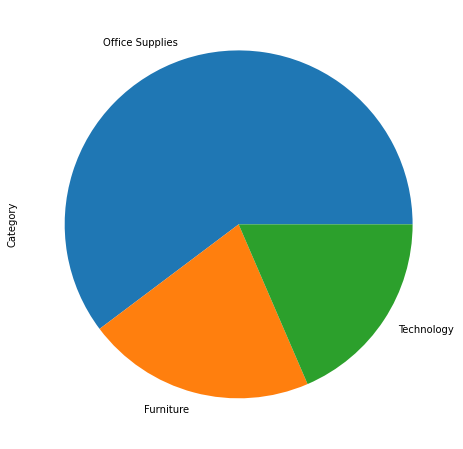

In [43]:
plt.figure(figsize=(8,8))
df['Category'].value_counts().plot.pie()
plt.show()

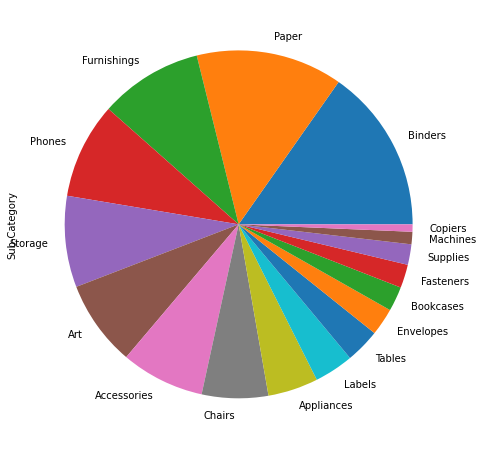

In [44]:
plt.figure(figsize=(8,8))
df['Sub-Category'].value_counts().plot.pie()
plt.show()

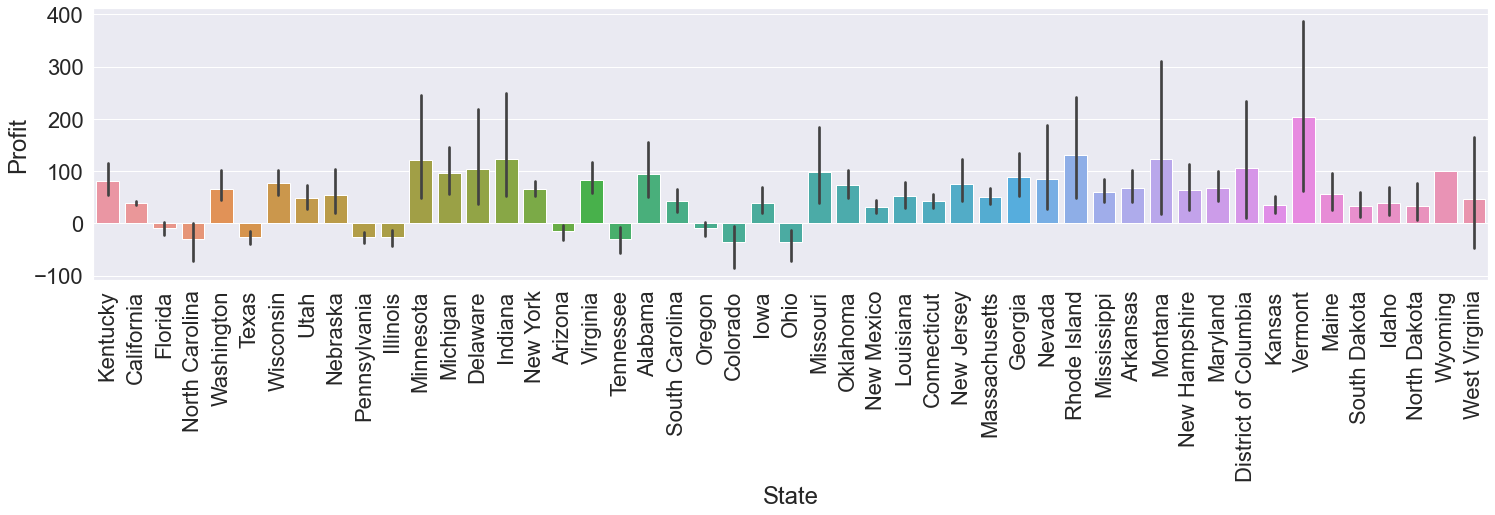

In [54]:
plt.figure(figsize=(25,5))
sns.set(font_scale = 2)
sns.barplot(x='State', y='Profit', data = df)
plt.xticks(rotation=90)
plt.show()

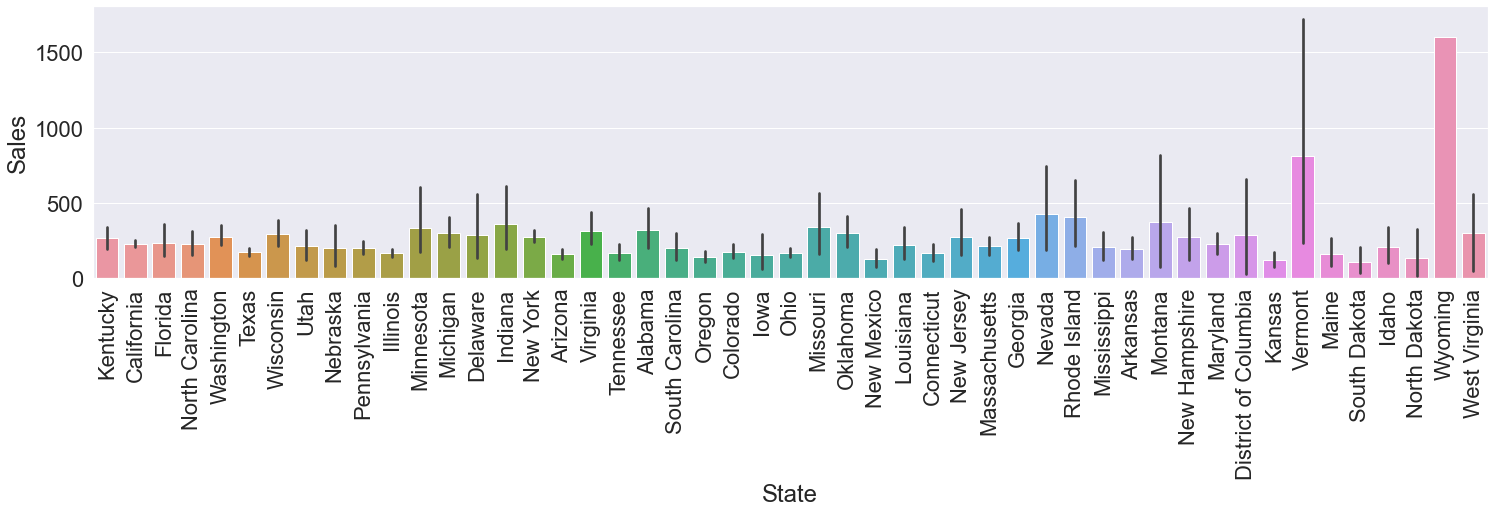

In [53]:
plt.figure(figsize=(25,5))
sns.set(font_scale = 2)
sns.barplot(x='State', y='Sales', data = df)
plt.xticks(rotation=90)
plt.show()

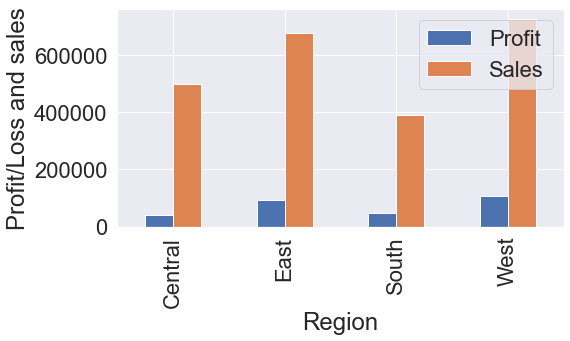

In [55]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(figsize=(8,4))
plt.ylabel('Profit/Loss and sales')
plt.show()

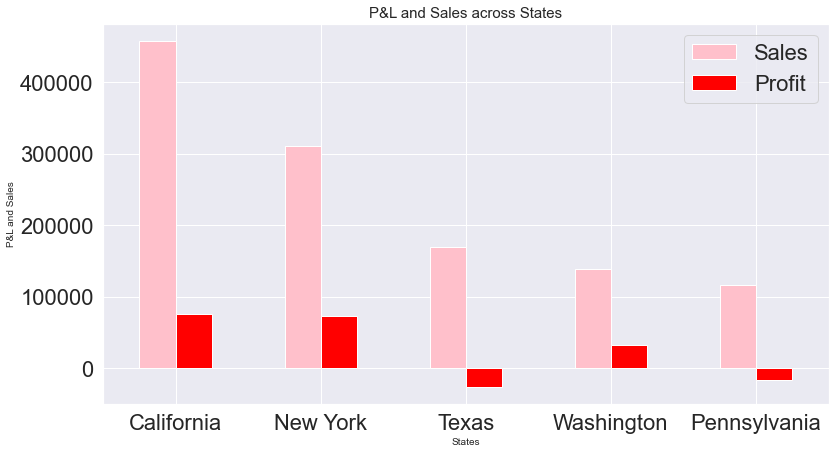

In [61]:
cd = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
cd[:5].plot.bar(color=['pink','red'] , figsize =(13,7))
plt.title('P&L and Sales across States',fontsize = 15)
plt.xlabel('States',fontsize = 10)
plt.ylabel('P&L and Sales',fontsize = 10)
plt.xticks(rotation = 0)
plt.show()

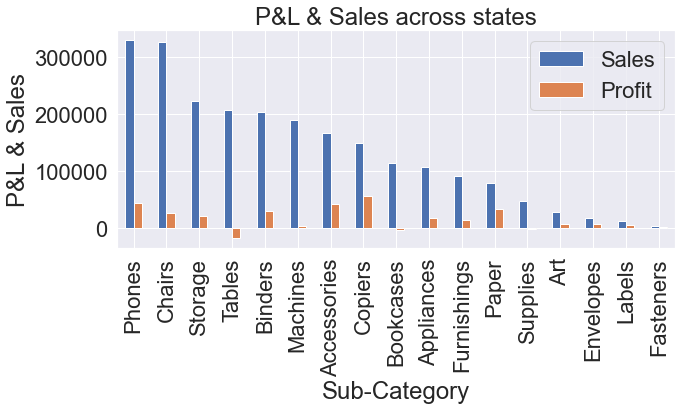

In [60]:
op = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
op[:].plot.bar(figsize=(10,4))
plt.title('P&L & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('P&L & Sales')
plt.show()

##### Observation : California is the State with maximum of Sales & Profit

### Conclusion
Weak areas where Manager can work to make more profit.

- Machines and supplies are having less profit and are a loss making sub-category.
- Florida, Texas, Pennsylvania, Illinois, Arizona, Tennesse, Orgeon, Colorado and Ohio are the loss making states.
- Furnitures are not providing much profit margin.
- Profits and Sales are not Linear in most of the states.
- Central region needs to be given more attention.

### Solutions
1. Giving low discount ( < 15%) on Office Sales products.
2. Advertising and improvising sales in some Central and Eastern states like Texas and Ohio using low discount, great deals etc.

## Thank you